In [1]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('../computer_vision/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../computer_vision/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

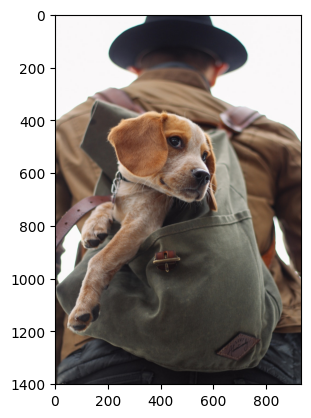

In [2]:
plt.imshow(img1)

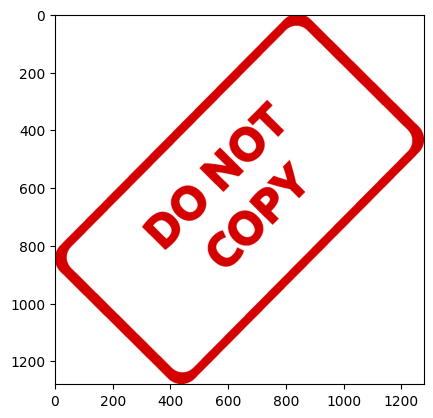

In [3]:
plt.imshow(img2)

In [4]:
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


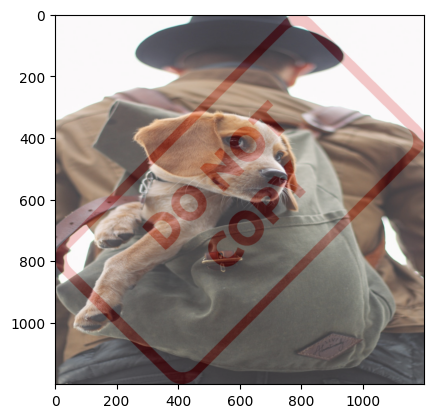

In [10]:
# blending images of the same size
img1_square = cv2.resize(img1,(1200,1200))
img2_square = cv2.resize(img2,(1200,1200))
blended = cv2.addWeighted(src1=img1_square,alpha=0.8,src2=img2_square,beta=0.2,gamma=0)
plt.imshow(blended)

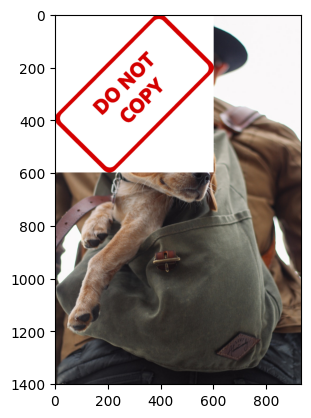

In [11]:
# overlay small image on top of a larger image (no blending)
# numpy reassignment
large = img1.copy()
small = cv2.resize(img2,(600,600))
x_offset = 0
y_offset = 0
x_end = x_offset + small.shape[1]
y_end = y_offset + small.shape[0]
large[y_offset:y_end,x_offset:x_end] = small
plt.imshow(large)

In [12]:
# blend together images with different sizes
large = img1.copy()
small = cv2.resize(img2,(600,600))
print(large.shape)
print(small.shape)


(1401, 934, 3)
(600, 600, 3)


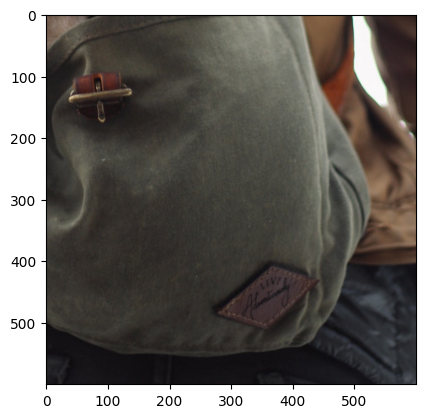

In [15]:
x_offset = large.shape[1]-small.shape[1]
y_offset = large.shape[0]-small.shape[0]
rows,cols,channels = small.shape
roi = img1[y_offset:large.shape[0],x_offset:large.shape[1]]
plt.imshow(roi)

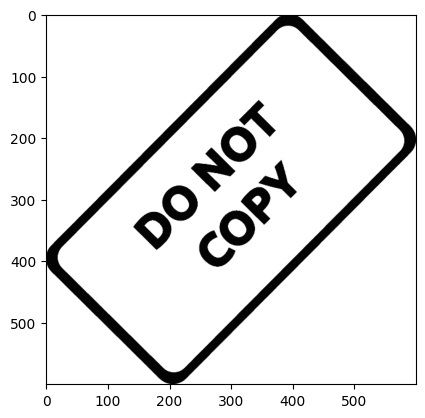

In [26]:
small_gray = cv2.cvtColor(small,cv2.COLOR_RGB2GRAY)
plt.imshow(small_gray,cmap='gray')

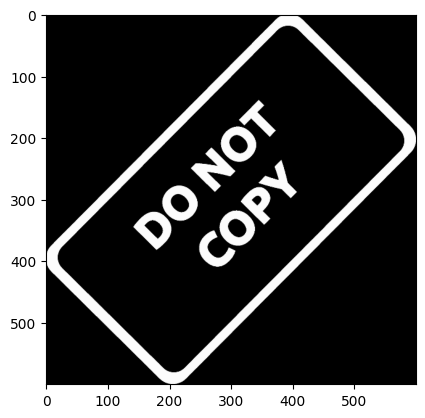

In [27]:
mask_inv = cv2.bitwise_not(small_gray)
plt.imshow(mask_inv,cmap='gray')

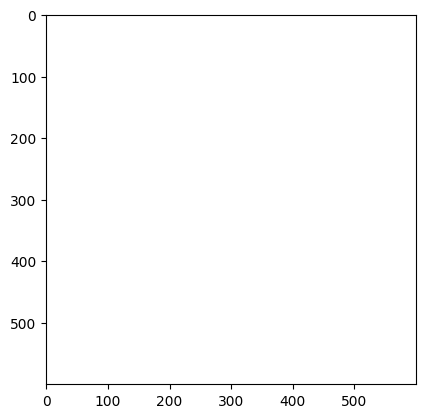

In [28]:
import numpy as np
white_background = np.full(small.shape,255,dtype=np.uint8)
plt.imshow(white_background)

In [29]:
background = cv2.bitwise_or(white_background,white_background,mask=mask_inv)
background

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [30]:
white_background.shape


(600, 600, 3)

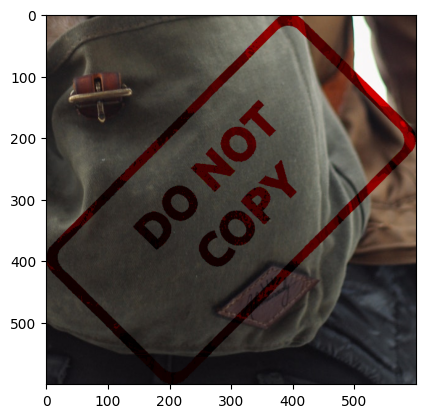

In [45]:
fg = cv2.bitwise_and(roi,small,small_gray)
plt.imshow(fg)


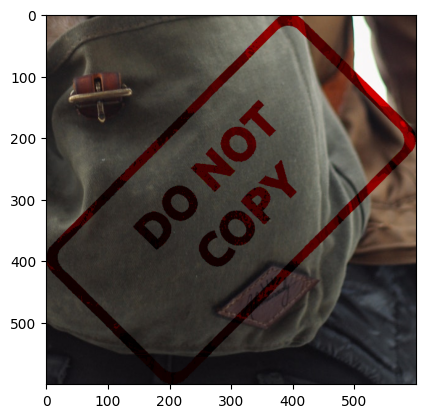

In [49]:
final_roi = cv2.bitwise_and(roi,fg,small_gray)
plt.imshow(final_roi)


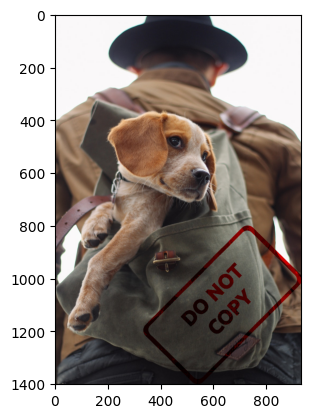

In [50]:
large[y_offset:y_offset+small.shape[0],x_offset:x_offset+small.shape[1]] = final_roi
plt.imshow(large)